<a href="https://colab.research.google.com/github/Sisasenkosi/Classification_using_CIFAR10/blob/main/my_cifar10_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## loading the data 
 
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
# printing the shape of the data 

print('x_train shape :', x_train.shape)
print('y_train shape :', y_train.shape)
print( x_train[0])

x_train shape : (50000, 32, 32, 3)
y_train shape : (50000, 1)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


#Now lets visualise the image 

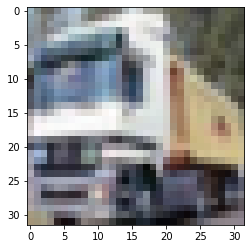

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

img = plt.imshow(x_train[1])

#imshow will display numbered pixel values of the first image 

# now lets see the label number 

In [ ]:
print('The label number in output is ', y_train[1])

The label number in output is  [9]


Lets use one hot encoding to denote the labels thus making labels 0 and 1s 1s

In [ ]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train,10)
y_test_one_hot  = keras.utils.to_categorical(y_test,10)

 # then lets visualise the 2nd label now in binary

print ('The one hot encoding lab is ', y_train_one_hot[1])

The one hot encoding lab is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Now we wanna make our input values for the images only btwn 0 - 1 by dividing by 255

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# now dividing
x_train = x_train/255
x_test = x_test/255

# now lets the output
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

Now we just imported the things we need, lets now call an empty sequential model then well add layers one by one

In [ ]:
model = Sequential()

## First layer

conv layer with filter size 3x3 stride size 1 (default), depth 32 is then added to our sequential model

In [ ]:
model.add(Conv2D(32, (3,3), activation ='relu', padding='same',  input_shape=(32,32,3)))

## Second layer
 - we dont need to specify input


In [ ]:
model.add(Conv2D(32, (3,3), activation ='relu', padding='same'))

## Third layer
- max pool with size 2x2 

In [ ]:
model.add(MaxPooling2D(pool_size= (2,2)))



In [ ]:
model.add(Dropout(0.25))

#we just added dropout layer to avoid overfitting

#The nex 4 layers 

In [ ]:
model.add(Conv2D(64, (3,3), activation ='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation ='relu', padding='same'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.25))


Now we flattern our neurons from cube like structure to one row

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(512, activation='relu'))

# we then add another dropout of 0.5 probability

model.add(Dropout(0.5))

#then add dense fc layer

model.add(Dense (10, activation='softmax'))

In [ ]:
# now to see the summary of architecture

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [ ]:
# we are done with specifying our model now we fll in the best numbers

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#the above loss function is applicable for classification of many classes

##Running the training

In [ ]:
hist = model.fit(x_train, y_train_one_hot, batch_size=32, epochs=20, validation_split=0.2)

#above states that size = 32 and 20 loops and noe instead of splitting data from beginning, we use "validation split" 
#this means that 20% is validation dataset

Epoch 1/20
1250/1250 [==============================] - 236s 188ms/step - loss: 1.7658 - accuracy: 0.3487 - val_loss: 1.1615 - val_accuracy: 0.5830
Epoch 2/20
1250/1250 [==============================] - 235s 188ms/step - loss: 1.1415 - accuracy: 0.5944 - val_loss: 0.9511 - val_accuracy: 0.6665
Epoch 3/20
1250/1250 [==============================] - 236s 189ms/step - loss: 0.9757 - accuracy: 0.6573 - val_loss: 0.8440 - val_accuracy: 0.7091
Epoch 4/20
1250/1250 [==============================] - 235s 188ms/step - loss: 0.8581 - accuracy: 0.6990 - val_loss: 0.7928 - val_accuracy: 0.7198
Epoch 5/20
1250/1250 [==============================] - 234s 187ms/step - loss: 0.7913 - accuracy: 0.7185 - val_loss: 0.7515 - val_accuracy: 0.7380
Epoch 6/20
1250/1250 [==============================] - 237s 190ms/step - loss: 0.7353 - accuracy: 0.7419 - val_loss: 0.7122 - val_accuracy: 0.7532
Epoch 7/20
1250/1250 [==============================] - 238s 190ms/step - loss: 0.6847 - accuracy: 0.7600 - val_

#Now lets visualise the model training and validation for our  epochs

<function matplotlib.pyplot.show>

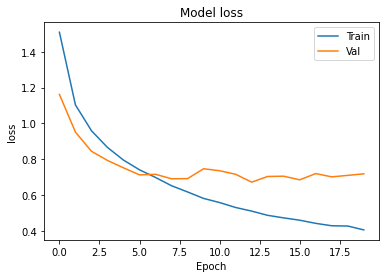

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show


<function matplotlib.pyplot.show>

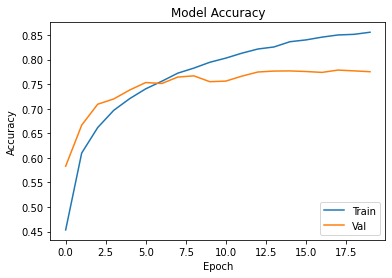

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show


#Now evaluating the model

In [ ]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 13s 42ms/step - loss: 0.7682 - accuracy: 0.7639


0.7638999819755554

#lets save our model

In [ ]:
model.save('my_cifar10_model.h5')